In [22]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time


from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
import pyart

f1 = r"/home/liyuan3970/study_demo/met_plot/rader/pup/pintu/Z_RADR_I_Z9571_20190809172500_O_DOR_SA_CAP.bin.bz2"
f2 = r"/home/liyuan3970/study_demo/met_plot/rader/pup/pintu/Z_RADR_I_Z9577_20190809172500_O_DOR_SA_CAP.bin.bz2"
basedata1 = radar_io(f1) 
basedata2 = radar_io(f2)

r1 = basedata1.ToPyartRadar()
r2 = basedata2.ToPyartRadar()


cp1 = deepcopy(r1.fields['reflectivity']['data'])
r1.add_field_like('reflectivity', 'DT', cp1, replace_existing=True)
gatefilter1 = pyart.correct.GateFilter(r1)
gatefilter1.exclude_masked('reflectivity')
corr_vel1 = pyart.correct.dealias_region_based(
    r1, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter1, centered=True)
r1.add_field('VT', corr_vel1, replace_existing=True)



cp2 = deepcopy(r2.fields['reflectivity']['data'])
r2.add_field_like('reflectivity', 'DT', cp2, replace_existing=True)
gatefilter2 = pyart.correct.GateFilter(r2)
gatefilter2.exclude_masked('reflectivity')
corr_vel2 = pyart.correct.dealias_region_based(
    r2, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter2, centered=True)
r2.add_field('VT', corr_vel2, replace_existing=True)



# The analysis engine currently expects the "missing_value" attribute
r1.fields['DT']['missing_value'] = 1.0 * r1.fields['DT']['_FillValue']
r2.fields['DT']['missing_value'] = 1.0 * r2.fields['DT']['_FillValue']
r1.fields['VT']['missing_value'] = 1.0 * r1.fields['VT']['_FillValue']
r2.fields['VT']['missing_value'] = 1.0 * r2.fields['VT']['_FillValue']

radars1 =[r1]
grids1 = pyart.map.grid_from_radars(
         radars1, grid_shape=(46, 251, 251),
        grid_limits=((0, 15000.0),(-150000, 150000), (-150000, 150000)),
        fields=['reflectivity','DT','VT'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')

radars2 =[r2]
grids2 = pyart.map.grid_from_radars(
         radars2, grid_shape=(46, 251, 251),
        grid_limits=((0, 15000.0),(-150000, 150000), (-150000, 150000)),
        fields=['reflectivity','DT','VT'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pydda/retrieval/angles.py:24: RuntimeWarning: invalid value encountered in arccos
  elev = np.arccos((Re**2 + slantrsq - rh**2)/(2 * Re * slantr))


Starting solver 
rmsVR = 13.594418743888696
Total points: 2312641
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  36.8457| 876.2200|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  26.6693
Norm of gradient: 0.018618195353961885
Iterations before filter: 10
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  17.1026| 459.5205|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  51.2373
Norm of gradient: 0.026630191840289703
Iterations before filter: 20
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|   5.4789| 341.6181|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  60.2950
Norm of gradient: 0.007305274449237172
Iterations before filter: 30
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|   4.3518| 299.6695|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  63.3620
Norm of gradient: 0.009127066882492797
Iterations before filter: 40
| Jvel    | Jmass 

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|36250.2349| 367.7272|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  30.7993
Norm of gradient: 0.5366825508530373
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|35469.7197| 364.2567|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  30.7710
Norm of gradient: 0.53058128953526
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  67.6508| 832.8118|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  30.1138
Norm of gradient: 0.03555578605931356
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  39.7196| 685.8823|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  32.6017
Norm of gradient: 0.031842018837674006
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  37.6748| 512.0184|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  37.6213
Norm of gradient: 0.025720743583004486
| Jve

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


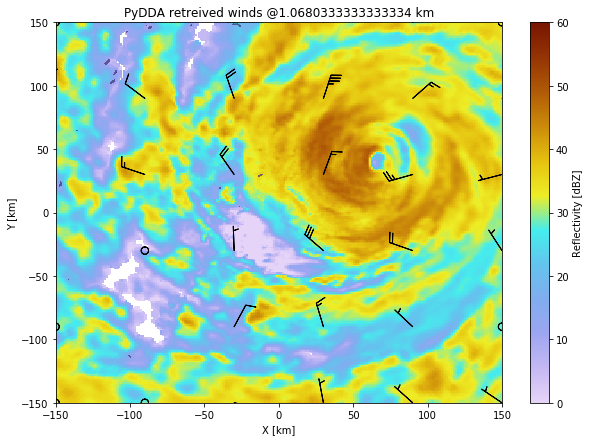

In [23]:
import pyart
import pydda
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Set initialization and do retrieval
u_init, v_init, w_init = pydda.initialization.make_constant_wind_field(grids2, vel_field='VT')

new_grids = pydda.retrieval.get_dd_wind_field([grids2],
                                              u_init, v_init, w_init,
                                              vel_name='VT', refl_field='DT',
                                              mask_outside_opt=True)
# Make a neat plot
fig = plt.figure(figsize=(10,7))
ax = pydda.vis.plot_horiz_xsection_barbs(new_grids, background_field='DT', 
                                        level=1,vmin=0, vmax=60,
                                        w_vel_contours=[3, 6, 9, 12, 15],
                                        barb_spacing_x_km=60.0,
                                        barb_spacing_y_km=60.0)
#ax.set_xticks(np.arange(150.5, 153, 0.1))
#ax.set_yticks(np.arange(-36, -32.0, 0.1))
#ax.set_xlim([151.0, 151.35])
#ax.set_ylim([-34.15, -33.9])
plt.show(ax)


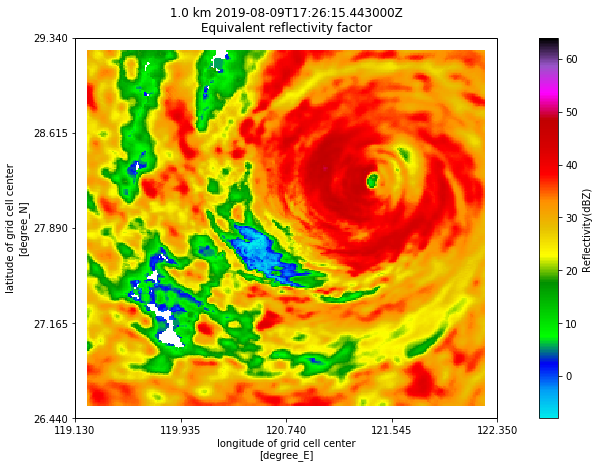

In [24]:
display = pyart.graph.GridMapDisplay(grids2)
fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# parameters
level = 3
vmin = -8
vmax = 64
lat = 36.5
lon = -98.0

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
#display.plot_basemap(lon_lines = np.arange(-104, -93, 2) )
display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)